

A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR

Like any real-world data set, we will encounter noise in both the images and labels. Images may contain artifacts, be out of focus, underexposed, or overexposed. The images were gathered from multiple clinics using a variety of cameras over an extended period of time, which will introduce further variation.

For the purpose of enabling running this over Colab, I have resized the images to 300x300 pixels and provided two numpy files containing all the data. One with images and other with their labels. If you want access to full resulution image you may download from the kaggle page. The total download size is alomost 9 GB.  

1. Split the data (3662 images) into a training and test set.
2. Make a CNN to predict the labels for the retinal images.

In [ ]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import cv2;
import matplotlib.pyplot as plt
import numpy as np;
from random import shuffle;
import cv2;
from random import shuffle;
from tqdm import tqdm;
import tensorflow;
from tensorflow.keras import layers;
from tensorflow.keras import Model;
from tensorflow.keras.optimizers import SGD;
from tensorflow.keras.callbacks import TensorBoard;
IMAGE_SIZE = 300;

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
train_Data_X_File = drive.CreateFile({'id': '1QV0Vq8L4vrHCqigW6kIWKjac3Exd6Och'});
train_Data_Y_File = drive.CreateFile({'id': '1Gdr91plxjjwUAGHLHlT9Im-bVybVp3p7'});

In [ ]:
#This block takes 4-5 minutes to load the training data.
train_Data_X_File.GetContentFile('train_Data_X.npy');
train_Data_X = np.load('train_Data_X.npy', allow_pickle=True)

train_Data_Y_File.GetContentFile('train_Data_Y.npy');
train_Data_Y = np.load('train_Data_Y.npy', allow_pickle=True)

In [ ]:
train_Data_X.shape
#No of training images, First columns is of images and second is of labels

(3662, 1, 300, 300, 3)

In [ ]:
train_Data_Y.shape

(3662, 1)

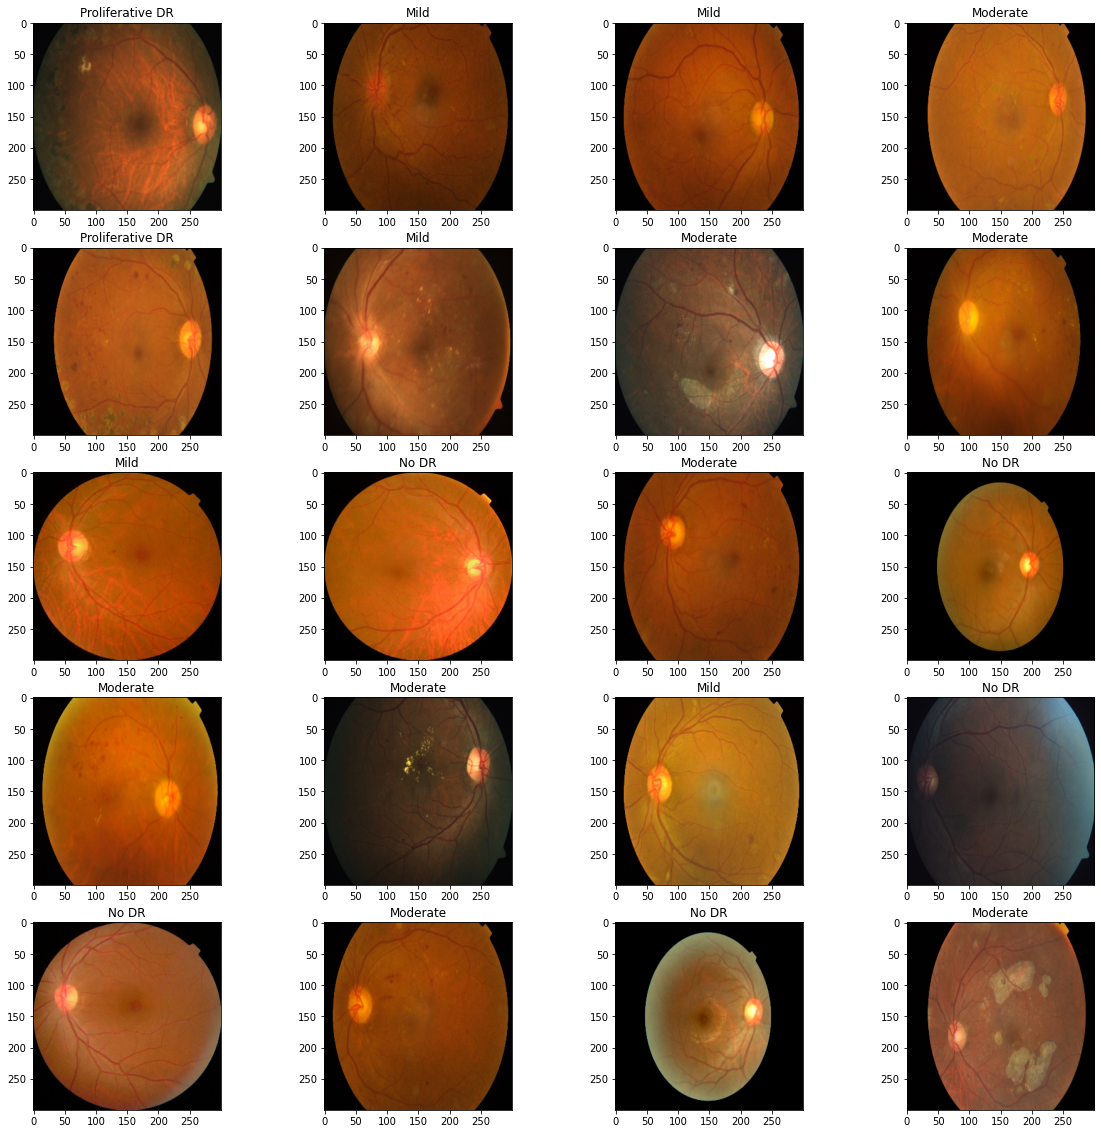

In [ ]:
#Show some training images with labels
count = 0;
Num_of_Images = 20;
plt.figure(figsize=(20,20))

label = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'];

for i in np.random.randint(1000, size = Num_of_Images):
  count = count+1;
  plt.subplot(Num_of_Images/4,4, count);
  plt.imshow(np.reshape(train_Data_X[i],(IMAGE_SIZE,IMAGE_SIZE,3)));
  plt.title(label[int(train_Data_Y[i])]);

In [ ]:
# Our input feature map is 300X300x3: 75x75 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=( IMAGE_SIZE, IMAGE_SIZE, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# fourth convolution extracts 128 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(512, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)




# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a two nodes and softmax activation
output = layers.Dense(5, activation='softmax')(x)

# Create model:
model = Model(img_input, output)

In [ ]:
model.summary()


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 35, 35, 64)        0   

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc']);

In [ ]:
train_Data_X=train_Data_X.reshape(3662, 300, 300, 3)
split=int(0.8*3662)
X_train = np.array([i for i in tqdm(train_Data_X[0:split])]);
Y_train = np.array([i for i in train_Data_Y[0:split]]);

X_test = np.array([i for i in tqdm(train_Data_X[split:])]);
Y_test = np.array([i for i in train_Data_Y[split:]]);


100%|██████████| 733/733 [00:00<00:00, 1452941.79it/s]


In [ ]:
model.fit(X_train,Y_train, batch_size =64, epochs = 10,verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
46/46 [==============================] - 4s 77ms/step - loss: 0.4768 - acc: 0.8242 - val_loss: 0.7355 - val_acc: 0.7517
Epoch 2/10
46/46 [==============================] - 3s 55ms/step - loss: 0.3981 - acc: 0.8515 - val_loss: 0.8245 - val_acc: 0.7490
Epoch 3/10
46/46 [==============================] - 3s 55ms/step - loss: 0.3554 - acc: 0.8628 - val_loss: 0.8175 - val_acc: 0.7476
Epoch 4/10
46/46 [==============================] - 3s 55ms/step - loss: 0.3105 - acc: 0.8853 - val_loss: 0.8583 - val_acc: 0.7381
Epoch 5/10
46/46 [==============================] - 2s 54ms/step - loss: 0.2939 - acc: 0.8894 - val_loss: 0.9364 - val_acc: 0.7080
Epoch 6/10
46/46 [==============================] - 2s 54ms/step - loss: 0.2525 - acc: 0.9061 - val_loss: 0.9726 - val_acc: 0.7121
Epoch 7/10
46/46 [==============================] - 2s 54ms/step - loss: 0.2229 - acc: 0.9286 - val_loss: 0.9651 - val_acc: 0.7558
Epoch 8/10
46/46 [==============================] - 3s 55ms/step - loss: 0.1890 - a

In [ ]:
P=P[0]
P.shape

(5,)

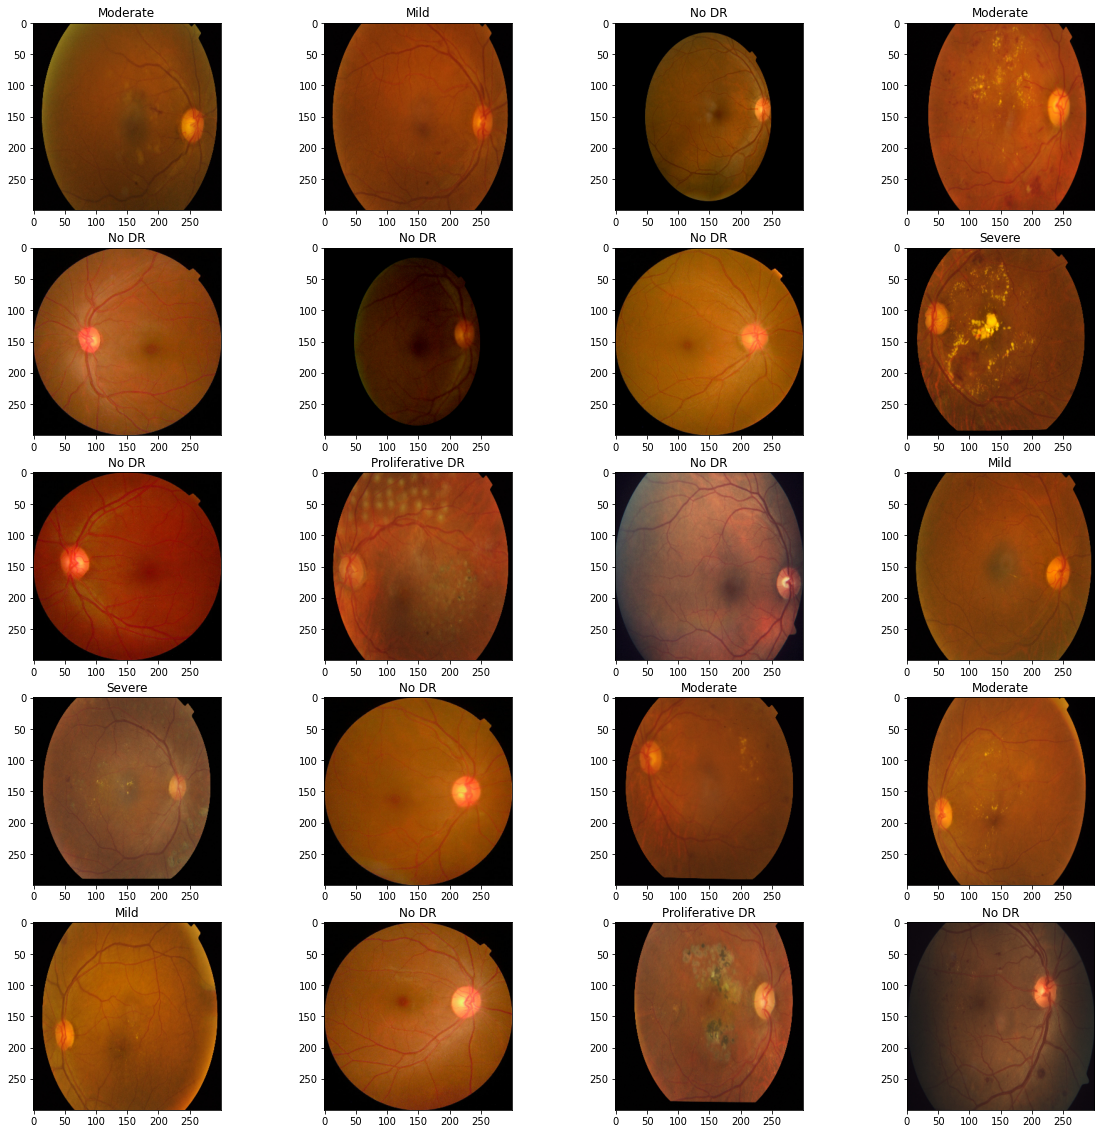

In [ ]:
#Show some training images with labels
count = 0;
Num_of_Images = 20;
plt.figure(figsize=(20,20))

label = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'];

for i in np.random.randint(500, size = Num_of_Images):
  count = count+1;
  plt.subplot(Num_of_Images/4,4, count);
  plt.imshow(X_test[i].reshape(IMAGE_SIZE, IMAGE_SIZE,3))
  P = model.predict(X_test[i].reshape(1,IMAGE_SIZE, IMAGE_SIZE,3))
  P=np.array(P)
  ma=np.argmax(P)
  plt.title(label[int(ma)]);

 
  